In [52]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Inicia la sesión de Spark
spark = SparkSession.builder.appName("RunningDataClustering").getOrCreate()

# Carga los datos desde el CSV
data = spark.read.csv("running.csv", header=True, inferSchema=True, sep=";")

In [53]:
print("Columns: ", data.columns)

# Selecciona las columnas relevantes (tiempo y distancia)
data = data.select("Time", "Distance", "Location")

# Elimina las filas con valores nulos
data = data.dropna()

data.head(3)

data.show()

Columns:  ['Date', 'Hour', 'Location', 'Time full', 'Time', 'Distance_km', 'Distance', 'Pace']
+----+--------+----------------+
|Time|Distance|        Location|
+----+--------+----------------+
|2035|    6800|     Unirun 2019|
|1948|    4560|        Guinard�|
|1857|    4590|        Guinard�|
|2145|    5260|        Guinard�|
|1526|    4250|        Guinard�|
|2611|    6680|        Guinard�|
|2974|    7010|   Vall d'Hebron|
|2479|    5450|        Guinard�|
|2568|    6720|        Guinard�|
|1451|    3440|       Can Drag�|
|3062|    7370|Diagonal + Forum|
|2602|    7370|       Can Drag�|
|4643|   11150| Passeig mar�tim|
|3107|    8550| Passeig mar�tim|
|1499|    4750|       Can Drag�|
|1980|    5050|   Vall d'Hebron|
|2076|    5510|   Vall d'Hebron|
|1500|    4830|       Can Drag�|
|2316|    7250|       Can Drag�|
|2239|    6600|           Forum|
+----+--------+----------------+
only showing top 20 rows



In [54]:
from pyspark.ml.feature import StringIndexer

# Creamos un objeto StringIndexer y especificamos la columna de entrada y la columna de salida
indexer = StringIndexer(inputCol="Location", outputCol="IndexLocation")


# Ajustamos el StringIndexer al DataFrame y transformamos los datos
data = indexer.fit(data).transform(data)

print("Columns: ", data.columns)
data.show()

Columns:  ['Time', 'Distance', 'Location', 'IndexLocation']
+----+--------+----------------+-------------+
|Time|Distance|        Location|IndexLocation|
+----+--------+----------------+-------------+
|2035|    6800|     Unirun 2019|         33.0|
|1948|    4560|        Guinard�|          3.0|
|1857|    4590|        Guinard�|          3.0|
|2145|    5260|        Guinard�|          3.0|
|1526|    4250|        Guinard�|          3.0|
|2611|    6680|        Guinard�|          3.0|
|2974|    7010|   Vall d'Hebron|          5.0|
|2479|    5450|        Guinard�|          3.0|
|2568|    6720|        Guinard�|          3.0|
|1451|    3440|       Can Drag�|          0.0|
|3062|    7370|Diagonal + Forum|         21.0|
|2602|    7370|       Can Drag�|          0.0|
|4643|   11150| Passeig mar�tim|          7.0|
|3107|    8550| Passeig mar�tim|          7.0|
|1499|    4750|       Can Drag�|          0.0|
|1980|    5050|   Vall d'Hebron|          5.0|
|2076|    5510|   Vall d'Hebron|          5.0|


In [55]:
from pyspark.ml.feature import VectorAssembler
# Convierte los datos a un formato adecuado para KMeans
assembler = VectorAssembler(inputCols=['Time', 'Distance'], outputCol="features")
final_data = assembler.transform(data)

final_data.show()

+----+--------+----------------+-------------+----------------+
|Time|Distance|        Location|IndexLocation|        features|
+----+--------+----------------+-------------+----------------+
|2035|    6800|     Unirun 2019|         33.0| [2035.0,6800.0]|
|1948|    4560|        Guinard�|          3.0| [1948.0,4560.0]|
|1857|    4590|        Guinard�|          3.0| [1857.0,4590.0]|
|2145|    5260|        Guinard�|          3.0| [2145.0,5260.0]|
|1526|    4250|        Guinard�|          3.0| [1526.0,4250.0]|
|2611|    6680|        Guinard�|          3.0| [2611.0,6680.0]|
|2974|    7010|   Vall d'Hebron|          5.0| [2974.0,7010.0]|
|2479|    5450|        Guinard�|          3.0| [2479.0,5450.0]|
|2568|    6720|        Guinard�|          3.0| [2568.0,6720.0]|
|1451|    3440|       Can Drag�|          0.0| [1451.0,3440.0]|
|3062|    7370|Diagonal + Forum|         21.0| [3062.0,7370.0]|
|2602|    7370|       Can Drag�|          0.0| [2602.0,7370.0]|
|4643|   11150| Passeig mar�tim|        

In [67]:
from pyspark.ml.clustering import KMeans

# Instancia el modelo KMeans con el número deseado de clusters
kmeans = KMeans(featuresCol="features", k=5)

# Entrena el modelo
model = kmeans.fit(final_data)

In [68]:
# Obtiene las etiquetas de los clusters
predictions = model.transform(final_data)

# Visualiza los resultados
predictions.show()

+----+--------+----------------+-------------+----------------+----------+
|Time|Distance|        Location|IndexLocation|        features|prediction|
+----+--------+----------------+-------------+----------------+----------+
|2035|    6800|     Unirun 2019|         33.0| [2035.0,6800.0]|         3|
|1948|    4560|        Guinard�|          3.0| [1948.0,4560.0]|         0|
|1857|    4590|        Guinard�|          3.0| [1857.0,4590.0]|         0|
|2145|    5260|        Guinard�|          3.0| [2145.0,5260.0]|         0|
|1526|    4250|        Guinard�|          3.0| [1526.0,4250.0]|         0|
|2611|    6680|        Guinard�|          3.0| [2611.0,6680.0]|         3|
|2974|    7010|   Vall d'Hebron|          5.0| [2974.0,7010.0]|         3|
|2479|    5450|        Guinard�|          3.0| [2479.0,5450.0]|         0|
|2568|    6720|        Guinard�|          3.0| [2568.0,6720.0]|         3|
|1451|    3440|       Can Drag�|          0.0| [1451.0,3440.0]|         4|
|3062|    7370|Diagonal +

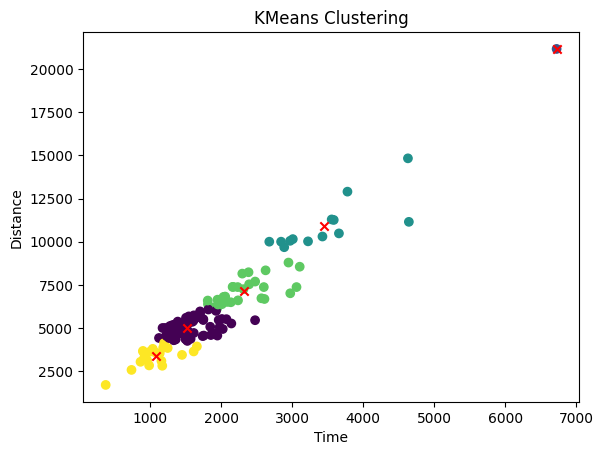

In [69]:
# Grafica los clusters
centers = model.clusterCenters()
plt.scatter(predictions.select('Time').collect(),
            predictions.select('Distance').collect(),
            c=predictions.select('prediction').collect(),
            cmap='viridis')
plt.scatter([c[0] for c in centers], [c[1] for c in centers], c='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('KMeans Clustering')
plt.show()

In [70]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Calcula WSSSE (cuanto menor, mejor)
wssse = model.summary.trainingCost
print("Within Set Sum of Squared Errors = " + str(wssse))

# Calcula el coeficiente de Silhouette (1=buen cluster, -1=mal cluster)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Within Set Sum of Squared Errors = 78793371.1492674
Silhouette with squared euclidean distance = 0.737454401546357


In [18]:
# Guarda los datos con las etiquetas de los clusters en un nuevo CSV
predictions.select('Time', 'Distance', 'prediction').toPandas().to_csv('running_clustered.csv', index=False)